In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
from tqdm import tqdm
import pickle

import matplotlib.animation as animation
from IPython.display import Video
import h3
from h3.unstable import vect


import hexbin_functions as hexfunc

/nethome/6525954/.conda/envs/nemo-ensemble/lib/python3.12/site-packages/h3/unstable/__init__.py:4: UserWarning: Modules under `h3.unstable` are experimental, and may change at any time.
  warnings.warn(


## 1. Select the Ginea-Pig (Ensemble $M_{23}$)

I selected ensemble member #23 ($M_{23}$) [arbitrarily...](https://media.gettyimages.com/id/961004764/nl/foto/east-rutherford-nj-michael-jordan-of-the-chicago-bulls-shoots-a-free-throw-against-the-new.jpg?s=2048x2048&w=gi&k=20&c=fZTcydkAJj5nTqfD4O-0kbGugXnFTPDfKYN0GPnNHTo=)

In [2]:
location = 'Cape_Hatteras'
member = 50 # memeber
std = 0.01 # Standard deviation od initial dispersion

file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/{location}/std_{std*100:03.0f}/{location}_std{std*100:03.0f}_m{member:03d}.zarr"
pset = xr.open_zarr(file_path)

In [3]:
pset

<xarray.Dataset> Size: 5GB
Dimensions:     (trajectory: 74500, obs: 1400)
Coordinates:
  * obs         (obs) int32 6kB 0 1 2 3 4 5 6 ... 1394 1395 1396 1397 1398 1399
  * trajectory  (trajectory) int64 596kB 0 1 2 3 4 ... 74496 74497 74498 74499
Data variables:
    hexbin_id   (trajectory, obs) float32 417MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    lat         (trajectory, obs) float64 834MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    lon         (trajectory, obs) float64 834MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    time        (trajectory, obs) datetime64[ns] 834MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    u           (trajectory, obs) float32 417MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    v           (trajectory, obs) float32 417MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    w           (trajectory, obs) float32 417MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    z           (trajectory, obs) float64 834MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        EnsembleParticleAdvectionRK4_3DSampleFieldKeepInO...
    parcels_mesh:           spherical
    parcels_version:        3.0.2

In this case the levels represent of the continous release criteria. De cuantas formas puedes reorganizar 7400 particulas?

In [4]:
subgroups = {}

max_gap = 15
timesteps = np.linspace(1, 745, 745, dtype=int)
max_releases = timesteps[0::max_gap].shape[0]

set = np.linspace(0, 100, 100, dtype=int)

for i in range(1,max_gap):
    set_start = timesteps[0::i][:max_releases]*100
    indexes = []
    
    for j in set_start:
        indexes = indexes + list(j+set)
    
    subgroups[i] = np.array(indexes)
    

In [5]:
subgroups

{1: array([ 100,  101,  102, ..., 5097, 5098, 5100]),
 2: array([  100,   101,   102, ...,  9997,  9998, 10000]),
 3: array([  100,   101,   102, ..., 14897, 14898, 14900]),
 4: array([  100,   101,   102, ..., 19797, 19798, 19800]),
 5: array([  100,   101,   102, ..., 24697, 24698, 24700]),
 6: array([  100,   101,   102, ..., 29597, 29598, 29600]),
 7: array([  100,   101,   102, ..., 34497, 34498, 34500]),
 8: array([  100,   101,   102, ..., 39397, 39398, 39400]),
 9: array([  100,   101,   102, ..., 44297, 44298, 44300]),
 10: array([  100,   101,   102, ..., 49197, 49198, 49200]),
 11: array([  100,   101,   102, ..., 54097, 54098, 54100]),
 12: array([  100,   101,   102, ..., 58997, 58998, 59000]),
 13: array([  100,   101,   102, ..., 63897, 63898, 63900]),
 14: array([  100,   101,   102, ..., 68797, 68798, 68800])}

In [6]:
pset

<xarray.Dataset> Size: 5GB
Dimensions:     (trajectory: 74500, obs: 1400)
Coordinates:
  * obs         (obs) int32 6kB 0 1 2 3 4 5 6 ... 1394 1395 1396 1397 1398 1399
  * trajectory  (trajectory) int64 596kB 0 1 2 3 4 ... 74496 74497 74498 74499
Data variables:
    hexbin_id   (trajectory, obs) float32 417MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    lat         (trajectory, obs) float64 834MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    lon         (trajectory, obs) float64 834MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    time        (trajectory, obs) datetime64[ns] 834MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    u           (trajectory, obs) float32 417MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    v           (trajectory, obs) float32 417MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    w           (trajectory, obs) float32 417MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
    z           (trajectory, obs) float64 834MB dask.array<chunksize=(74500, 100), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        EnsembleParticleAdvectionRK4_3DSampleFieldKeepInO...
    parcels_mesh:           spherical
    parcels_version:        3.0.2

In [7]:
pset.isel(trajectory=subgroups[1])

<xarray.Dataset> Size: 336MB
Dimensions:     (trajectory: 5000, obs: 1400)
Coordinates:
  * obs         (obs) int32 6kB 0 1 2 3 4 5 6 ... 1394 1395 1396 1397 1398 1399
  * trajectory  (trajectory) int64 40kB 100 101 102 103 ... 5096 5097 5098 5100
Data variables:
    hexbin_id   (trajectory, obs) float32 28MB dask.array<chunksize=(5000, 100), meta=np.ndarray>
    lat         (trajectory, obs) float64 56MB dask.array<chunksize=(5000, 100), meta=np.ndarray>
    lon         (trajectory, obs) float64 56MB dask.array<chunksize=(5000, 100), meta=np.ndarray>
    time        (trajectory, obs) datetime64[ns] 56MB dask.array<chunksize=(5000, 100), meta=np.ndarray>
    u           (trajectory, obs) float32 28MB dask.array<chunksize=(5000, 100), meta=np.ndarray>
    v           (trajectory, obs) float32 28MB dask.array<chunksize=(5000, 100), meta=np.ndarray>
    w           (trajectory, obs) float32 28MB dask.array<chunksize=(5000, 100), meta=np.ndarray>
    z           (trajectory, obs) float64 56MB dask.array<chunksize=(5000, 100), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        EnsembleParticleAdvectionRK4_3DSampleFieldKeepInO...
    parcels_mesh:           spherical
    parcels_version:        3.0.2

# Same day

# index pset by time

## 3. Build Dataset $\forall$ members

In [8]:
coreset = np.linspace(100, 200, 100, dtype=int)

In [9]:
coreset

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 200])

In [10]:
location = 'Cape_Hatteras'
member = 49 # memeber
std = 0.01 # Standard deviation od initial dispersion

path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/{location}/std_{std*100:03.0f}/{location}_std{std*100:03.0f}_m{member:03d}.zarr"
coreset = np.linspace(100, 200, 100, dtype=int)

pset_members = xr.open_zarr(path)
pset_members = pset_members.isel(trajectory=coreset)


for member in tqdm([1, 2, 47, 48, 49, 50]):
    print(member)
    path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/{location}/std_{std*100:03.0f}/{location}_std{std*100:03.0f}_m{member:03d}.zarr"

    pset_members_aux = xr.open_zarr(path)
    pset_members_aux = pset_members_aux.isel(trajectory=coreset)
    pset_members = xr.concat([pset_members, pset_members_aux], dim='trajectory')
    

 17%|█▋        | 1/6 [00:00<00:00,  5.09it/s]

1
2


 33%|███▎      | 2/6 [00:00<00:00,  4.87it/s]

47


 67%|██████▋   | 4/6 [00:00<00:00,  4.41it/s]

48
49


100%|██████████| 6/6 [00:01<00:00,  5.71it/s]

50


In [11]:
pset_members

<xarray.Dataset> Size: 47MB
Dimensions:     (trajectory: 700, obs: 1400)
Coordinates:
  * obs         (obs) int32 6kB 0 1 2 3 4 5 6 ... 1394 1395 1396 1397 1398 1399
  * trajectory  (trajectory) int64 6kB 100 101 102 103 104 ... 196 197 198 200
Data variables:
    hexbin_id   (trajectory, obs) float32 4MB dask.array<chunksize=(100, 100), meta=np.ndarray>
    lat         (trajectory, obs) float64 8MB dask.array<chunksize=(100, 100), meta=np.ndarray>
    lon         (trajectory, obs) float64 8MB dask.array<chunksize=(100, 100), meta=np.ndarray>
    time        (trajectory, obs) datetime64[ns] 8MB dask.array<chunksize=(100, 100), meta=np.ndarray>
    u           (trajectory, obs) float32 4MB dask.array<chunksize=(100, 100), meta=np.ndarray>
    v           (trajectory, obs) float32 4MB dask.array<chunksize=(100, 100), meta=np.ndarray>
    w           (trajectory, obs) float32 4MB dask.array<chunksize=(100, 100), meta=np.ndarray>
    z           (trajectory, obs) float64 8MB dask.array<chunksize=(100, 100), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        EnsembleParticleAdvectionRK4_3DSampleFieldKeepInO...
    parcels_mesh:           spherical
    parcels_version:        3.0.2

## 4. Build PDFs $\forall$ members

In [12]:
# load the hexbin grid 

with open('../data/hexgrid_no_coast.pkl', 'rb') as f:
    hexbin_grid = pickle.load(f)
    
hexbin_grid = hexfunc.hexGrid(hexbin_grid, h3_res=3)

In [13]:
obs_length = len(pset_members.obs)
n_hex = hexbin_grid.n_hex

probability = np.zeros((n_hex, obs_length))

lons, lats = pset_members['lon'][:, :].values, pset_members['lat'][:, :].values

for t in range(obs_length):
    probability[:, t] = hexbin_grid.count_2d(pset_members['lon'][:, t], pset_members['lat'][:, t], normalize=True)

 14%|█▍        | 194/1400 [00:32<03:17,  6.10it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 14%|█▍        | 198/1400 [00:33<03:33,  5.64it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 14%|█▍        | 200/1400 [00:33<03:23,  5.89it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 15%|█▍        | 204/1400 [00:34<03:07,  6.39it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 15%|█▍        | 206/1400 [00:34<03:15,  6.12it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 15%|█▍        | 208/1400 [00:34<03:15,  6.11it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 15%|█▌        | 214/1400 [00:35<03:16,  6.03it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 15%|█▌        | 216/1400 [00:36<03:17,  6.00it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 16%|█▌        | 218/1400 [00:36<03:27,  5.70it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 16%|█▌        | 220/1400 [00:36<03:25,  5.74it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 16%|█▌        | 222/1400 [00:37<03:08,  6.25it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 16%|█▌        | 224/1400 [00:37<03:13,  6.09it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 16%|█▌        | 226/1400 [00:37<03:25,  5.70it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 16%|█▋        | 228/1400 [00:38<03:24,  5.73it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 16%|█▋        | 230/1400 [00:38<03:29,  5.58it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 17%|█▋        | 232/1400 [00:39<03:26,  5.67it/s]

2 particles were not counted because they were outside the region of interest.


 17%|█▋        | 234/1400 [00:39<03:21,  5.80it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 17%|█▋        | 236/1400 [00:39<03:12,  6.06it/s]

2 particles were not counted because they were outside the region of interest.


 18%|█▊        | 246/1400 [00:41<03:19,  5.79it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 18%|█▊        | 248/1400 [00:41<03:25,  5.60it/s]

1 particles were not counted because they were outside the region of interest.


 24%|██▍       | 343/1400 [00:57<03:16,  5.37it/s]

1 particles were not counted because they were outside the region of interest.


 27%|██▋       | 382/1400 [01:03<02:49,  6.02it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 29%|██▉       | 403/1400 [01:07<02:52,  5.78it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 29%|██▉       | 405/1400 [01:07<02:49,  5.87it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 30%|███       | 422/1400 [01:10<02:54,  5.61it/s]

1 particles were not counted because they were outside the region of interest.


 31%|███       | 429/1400 [01:11<02:49,  5.73it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 31%|███       | 431/1400 [01:12<02:37,  6.17it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 32%|███▏      | 441/1400 [01:13<02:44,  5.84it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 32%|███▏      | 443/1400 [01:14<02:36,  6.13it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 32%|███▏      | 445/1400 [01:14<02:42,  5.89it/s]

1 particles were not counted because they were outside the region of interest.


 32%|███▏      | 448/1400 [01:14<02:40,  5.92it/s]

1 particles were not counted because they were outside the region of interest.


 32%|███▏      | 450/1400 [01:15<02:46,  5.70it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 32%|███▏      | 452/1400 [01:15<02:49,  5.58it/s]

1 particles were not counted because they were outside the region of interest.


 33%|███▎      | 457/1400 [01:16<02:41,  5.84it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 33%|███▎      | 461/1400 [01:17<02:48,  5.58it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 34%|███▎      | 472/1400 [01:19<02:48,  5.50it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 34%|███▍      | 474/1400 [01:19<02:46,  5.57it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 34%|███▍      | 476/1400 [01:19<02:41,  5.71it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 34%|███▍      | 478/1400 [01:20<02:45,  5.56it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 34%|███▍      | 480/1400 [01:20<02:46,  5.51it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 34%|███▍      | 482/1400 [01:20<02:43,  5.61it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 35%|███▍      | 484/1400 [01:21<02:42,  5.62it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 35%|███▍      | 486/1400 [01:21<02:43,  5.60it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 35%|███▍      | 488/1400 [01:22<02:41,  5.64it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 35%|███▌      | 490/1400 [01:22<02:38,  5.72it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 35%|███▌      | 492/1400 [01:22<02:36,  5.81it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 35%|███▌      | 494/1400 [01:23<02:45,  5.48it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 35%|███▌      | 496/1400 [01:23<02:45,  5.47it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 36%|███▌      | 498/1400 [01:23<02:45,  5.43it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 36%|███▌      | 500/1400 [01:24<02:45,  5.43it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 36%|███▌      | 502/1400 [01:24<02:44,  5.45it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 36%|███▌      | 504/1400 [01:24<02:39,  5.61it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 37%|███▋      | 524/1400 [01:28<02:38,  5.51it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 41%|████      | 568/1400 [01:36<02:24,  5.75it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 41%|████      | 572/1400 [01:36<02:27,  5.62it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 42%|████▏     | 582/1400 [01:38<02:23,  5.71it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 42%|████▏     | 584/1400 [01:39<02:22,  5.71it/s]

1 particles were not counted because they were outside the region of interest.


 42%|████▏     | 586/1400 [01:39<02:25,  5.61it/s]

1 particles were not counted because they were outside the region of interest.


 42%|████▏     | 590/1400 [01:40<02:26,  5.53it/s]

1 particles were not counted because they were outside the region of interest.


 43%|████▎     | 600/1400 [01:41<02:08,  6.25it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 43%|████▎     | 602/1400 [01:42<02:12,  6.02it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 43%|████▎     | 604/1400 [01:42<02:17,  5.81it/s]

1 particles were not counted because they were outside the region of interest.


 43%|████▎     | 608/1400 [01:43<02:26,  5.40it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 44%|████▎     | 610/1400 [01:43<02:26,  5.38it/s]

1 particles were not counted because they were outside the region of interest.


 44%|████▍     | 614/1400 [01:44<02:18,  5.67it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 44%|████▍     | 616/1400 [01:44<02:16,  5.74it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 44%|████▍     | 618/1400 [01:44<02:11,  5.95it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 44%|████▍     | 620/1400 [01:45<02:14,  5.81it/s]

1 particles were not counted because they were outside the region of interest.


 45%|████▍     | 625/1400 [01:46<02:09,  5.98it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 45%|████▍     | 627/1400 [01:46<02:09,  5.95it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 45%|████▍     | 629/1400 [01:46<02:14,  5.72it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 45%|████▌     | 631/1400 [01:47<02:15,  5.67it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 45%|████▌     | 633/1400 [01:47<02:17,  5.58it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 45%|████▌     | 635/1400 [01:47<02:11,  5.82it/s]

1 particles were not counted because they were outside the region of interest.


 48%|████▊     | 666/1400 [01:53<02:07,  5.77it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 49%|████▊     | 682/1400 [01:55<02:01,  5.93it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 49%|████▉     | 684/1400 [01:56<02:00,  5.93it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 49%|████▉     | 686/1400 [01:56<02:02,  5.83it/s]

1 particles were not counted because they were outside the region of interest.


 50%|█████     | 707/1400 [02:00<01:54,  6.03it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 51%|█████     | 710/1400 [02:00<01:50,  6.24it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 51%|█████     | 712/1400 [02:00<01:48,  6.36it/s]

1 particles were not counted because they were outside the region of interest.


 52%|█████▏    | 722/1400 [02:02<01:54,  5.93it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 52%|█████▏    | 724/1400 [02:02<01:58,  5.70it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 52%|█████▏    | 730/1400 [02:03<01:56,  5.76it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 52%|█████▏    | 732/1400 [02:04<02:01,  5.50it/s]

2 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 52%|█████▏    | 734/1400 [02:04<02:01,  5.50it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 53%|█████▎    | 737/1400 [02:05<01:59,  5.53it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 53%|█████▎    | 739/1400 [02:05<02:00,  5.50it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 53%|█████▎    | 741/1400 [02:05<02:01,  5.41it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 55%|█████▍    | 763/1400 [02:09<01:50,  5.76it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 55%|█████▍    | 765/1400 [02:10<01:51,  5.72it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 55%|█████▍    | 767/1400 [02:10<01:53,  5.60it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 55%|█████▍    | 769/1400 [02:10<01:54,  5.52it/s]

1 particles were not counted because they were outside the region of interest.


 55%|█████▌    | 771/1400 [02:11<01:54,  5.52it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 55%|█████▌    | 773/1400 [02:11<01:46,  5.90it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 55%|█████▌    | 775/1400 [02:11<01:43,  6.03it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 56%|█████▌    | 777/1400 [02:12<01:45,  5.90it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 56%|█████▌    | 779/1400 [02:12<01:46,  5.81it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 56%|█████▌    | 781/1400 [02:13<01:48,  5.70it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 56%|█████▌    | 783/1400 [02:13<01:45,  5.87it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 56%|█████▌    | 785/1400 [02:13<01:48,  5.66it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 57%|█████▋    | 795/1400 [02:15<01:42,  5.88it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 57%|█████▋    | 797/1400 [02:15<01:45,  5.70it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 57%|█████▋    | 799/1400 [02:16<01:46,  5.64it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 57%|█████▋    | 804/1400 [02:16<01:40,  5.91it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 58%|█████▊    | 806/1400 [02:17<01:45,  5.62it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 58%|█████▊    | 808/1400 [02:17<01:46,  5.58it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 58%|█████▊    | 810/1400 [02:18<01:46,  5.54it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 59%|█████▉    | 829/1400 [02:21<01:37,  5.89it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 59%|█████▉    | 832/1400 [02:21<01:38,  5.79it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 60%|█████▉    | 834/1400 [02:22<01:39,  5.70it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 60%|█████▉    | 836/1400 [02:22<01:39,  5.67it/s]

2 particles were not counted because they were outside the region of interest.


 60%|██████    | 842/1400 [02:23<01:33,  5.95it/s]

1 particles were not counted because they were outside the region of interest.


 62%|██████▏   | 868/1400 [02:28<01:33,  5.70it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 62%|██████▏   | 870/1400 [02:28<01:35,  5.57it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 63%|██████▎   | 876/1400 [02:29<01:31,  5.72it/s]

1 particles were not counted because they were outside the region of interest.


 63%|██████▎   | 879/1400 [02:30<01:31,  5.68it/s]

1 particles were not counted because they were outside the region of interest.


 63%|██████▎   | 885/1400 [02:31<01:24,  6.07it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 63%|██████▎   | 887/1400 [02:31<01:30,  5.69it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 64%|██████▎   | 889/1400 [02:32<01:24,  6.04it/s]

1 particles were not counted because they were outside the region of interest.


 64%|██████▍   | 902/1400 [02:34<01:24,  5.92it/s]

1 particles were not counted because they were outside the region of interest.


 65%|██████▍   | 908/1400 [02:35<01:20,  6.13it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 65%|██████▌   | 910/1400 [02:35<01:24,  5.83it/s]

1 particles were not counted because they were outside the region of interest.


 66%|██████▌   | 922/1400 [02:37<01:26,  5.53it/s]

1 particles were not counted because they were outside the region of interest.


 66%|██████▌   | 924/1400 [02:37<01:19,  5.98it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 66%|██████▌   | 926/1400 [02:38<01:19,  5.99it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 66%|██████▋   | 928/1400 [02:38<01:19,  5.94it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 66%|██████▋   | 930/1400 [02:38<01:16,  6.11it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 67%|██████▋   | 932/1400 [02:39<01:18,  5.96it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 67%|██████▋   | 934/1400 [02:39<01:19,  5.87it/s]

2 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 67%|██████▋   | 936/1400 [02:39<01:21,  5.68it/s]

3 particles were not counted because they were outside the region of interest.
4 particles were not counted because they were outside the region of interest.


 67%|██████▋   | 938/1400 [02:40<01:18,  5.86it/s]

3 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 67%|██████▋   | 940/1400 [02:40<01:19,  5.77it/s]

3 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 67%|██████▋   | 942/1400 [02:40<01:18,  5.82it/s]

2 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 67%|██████▋   | 944/1400 [02:41<01:21,  5.59it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 68%|██████▊   | 946/1400 [02:41<01:19,  5.71it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 68%|██████▊   | 948/1400 [02:41<01:18,  5.74it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 68%|██████▊   | 950/1400 [02:42<01:16,  5.87it/s]

2 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 68%|██████▊   | 952/1400 [02:42<01:16,  5.86it/s]

1 particles were not counted because they were outside the region of interest.


 68%|██████▊   | 956/1400 [02:43<01:17,  5.74it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 68%|██████▊   | 958/1400 [02:43<01:16,  5.74it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 69%|██████▊   | 960/1400 [02:43<01:16,  5.78it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 69%|██████▊   | 962/1400 [02:44<01:12,  6.01it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 69%|██████▉   | 964/1400 [02:44<01:06,  6.55it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 69%|██████▉   | 966/1400 [02:44<01:05,  6.62it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 69%|██████▉   | 968/1400 [02:45<01:10,  6.09it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 69%|██████▉   | 970/1400 [02:45<01:13,  5.82it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 69%|██████▉   | 972/1400 [02:45<01:11,  6.02it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 70%|██████▉   | 974/1400 [02:46<01:08,  6.22it/s]

3 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 70%|██████▉   | 976/1400 [02:46<01:10,  5.99it/s]

2 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 70%|██████▉   | 978/1400 [02:46<01:13,  5.77it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 70%|███████   | 980/1400 [02:47<01:14,  5.67it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 70%|███████   | 982/1400 [02:47<01:12,  5.76it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 70%|███████   | 984/1400 [02:48<01:16,  5.47it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 70%|███████   | 986/1400 [02:48<01:15,  5.51it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 71%|███████   | 988/1400 [02:48<01:12,  5.71it/s]

1 particles were not counted because they were outside the region of interest.


 71%|███████   | 991/1400 [02:49<01:06,  6.14it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 71%|███████   | 993/1400 [02:49<01:08,  5.95it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 71%|███████   | 995/1400 [02:49<01:07,  5.96it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 71%|███████   | 997/1400 [02:50<01:06,  6.04it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 71%|███████▏  | 999/1400 [02:50<01:06,  6.06it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 72%|███████▏  | 1001/1400 [02:50<01:06,  6.00it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 72%|███████▏  | 1003/1400 [02:51<01:09,  5.68it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 72%|███████▏  | 1005/1400 [02:51<01:06,  5.93it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 72%|███████▏  | 1007/1400 [02:51<01:05,  5.97it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 72%|███████▏  | 1009/1400 [02:52<01:01,  6.31it/s]

3 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 72%|███████▏  | 1011/1400 [02:52<01:04,  6.01it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 72%|███████▏  | 1013/1400 [02:52<01:06,  5.85it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 72%|███████▎  | 1015/1400 [02:53<01:09,  5.57it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 73%|███████▎  | 1017/1400 [02:53<01:08,  5.60it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 73%|███████▎  | 1019/1400 [02:53<01:07,  5.65it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 73%|███████▎  | 1021/1400 [02:54<01:06,  5.68it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 73%|███████▎  | 1023/1400 [02:54<01:08,  5.51it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 73%|███████▎  | 1025/1400 [02:55<01:02,  5.96it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 73%|███████▎  | 1027/1400 [02:55<01:03,  5.84it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 74%|███████▍  | 1034/1400 [02:56<01:03,  5.80it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 74%|███████▍  | 1036/1400 [02:56<01:01,  5.93it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 74%|███████▍  | 1038/1400 [02:57<01:02,  5.82it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 74%|███████▍  | 1040/1400 [02:57<00:57,  6.22it/s]

3 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 74%|███████▍  | 1042/1400 [02:57<00:55,  6.44it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 75%|███████▍  | 1044/1400 [02:58<00:53,  6.59it/s]

2 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 75%|███████▍  | 1046/1400 [02:58<00:56,  6.22it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 75%|███████▍  | 1048/1400 [02:58<00:54,  6.48it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 75%|███████▌  | 1050/1400 [02:59<00:55,  6.36it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 75%|███████▌  | 1052/1400 [02:59<00:57,  6.10it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 75%|███████▌  | 1054/1400 [02:59<00:55,  6.19it/s]

3 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 75%|███████▌  | 1056/1400 [03:00<00:59,  5.80it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 76%|███████▌  | 1058/1400 [03:00<00:55,  6.21it/s]

3 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 76%|███████▌  | 1060/1400 [03:00<00:57,  5.90it/s]

3 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 76%|███████▌  | 1062/1400 [03:01<00:59,  5.64it/s]

3 particles were not counted because they were outside the region of interest.
5 particles were not counted because they were outside the region of interest.


 76%|███████▌  | 1064/1400 [03:01<00:56,  5.90it/s]

4 particles were not counted because they were outside the region of interest.
4 particles were not counted because they were outside the region of interest.


 76%|███████▌  | 1066/1400 [03:01<01:00,  5.52it/s]

3 particles were not counted because they were outside the region of interest.
4 particles were not counted because they were outside the region of interest.


 76%|███████▋  | 1068/1400 [03:02<01:00,  5.52it/s]

4 particles were not counted because they were outside the region of interest.
4 particles were not counted because they were outside the region of interest.


 76%|███████▋  | 1070/1400 [03:02<01:00,  5.45it/s]

3 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 77%|███████▋  | 1072/1400 [03:02<00:59,  5.55it/s]

3 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 77%|███████▋  | 1074/1400 [03:03<00:56,  5.73it/s]

4 particles were not counted because they were outside the region of interest.
4 particles were not counted because they were outside the region of interest.


 77%|███████▋  | 1076/1400 [03:03<00:55,  5.87it/s]

3 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 77%|███████▋  | 1078/1400 [03:03<00:56,  5.70it/s]

3 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 77%|███████▋  | 1080/1400 [03:04<00:53,  6.03it/s]

3 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 77%|███████▋  | 1082/1400 [03:04<00:51,  6.16it/s]

3 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 77%|███████▋  | 1084/1400 [03:04<00:51,  6.18it/s]

4 particles were not counted because they were outside the region of interest.
4 particles were not counted because they were outside the region of interest.


 78%|███████▊  | 1086/1400 [03:05<00:53,  5.88it/s]

4 particles were not counted because they were outside the region of interest.
4 particles were not counted because they were outside the region of interest.


 78%|███████▊  | 1088/1400 [03:05<00:54,  5.72it/s]

3 particles were not counted because they were outside the region of interest.
4 particles were not counted because they were outside the region of interest.


 78%|███████▊  | 1090/1400 [03:05<00:52,  5.94it/s]

4 particles were not counted because they were outside the region of interest.
4 particles were not counted because they were outside the region of interest.


 78%|███████▊  | 1092/1400 [03:06<00:49,  6.28it/s]

3 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 78%|███████▊  | 1094/1400 [03:06<00:48,  6.31it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 78%|███████▊  | 1096/1400 [03:06<00:49,  6.15it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 78%|███████▊  | 1098/1400 [03:07<00:52,  5.70it/s]

3 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 79%|███████▊  | 1100/1400 [03:07<00:49,  6.01it/s]

3 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 79%|███████▊  | 1102/1400 [03:07<00:47,  6.27it/s]

3 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 79%|███████▉  | 1104/1400 [03:08<00:47,  6.19it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 79%|███████▉  | 1106/1400 [03:08<00:49,  5.97it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 79%|███████▉  | 1108/1400 [03:08<00:48,  6.01it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 79%|███████▉  | 1110/1400 [03:09<00:51,  5.62it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 79%|███████▉  | 1112/1400 [03:09<00:50,  5.75it/s]

2 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 80%|███████▉  | 1114/1400 [03:10<00:48,  5.93it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 80%|███████▉  | 1116/1400 [03:10<00:45,  6.23it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 80%|███████▉  | 1118/1400 [03:10<00:50,  5.55it/s]

2 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 80%|████████  | 1120/1400 [03:11<00:48,  5.76it/s]

4 particles were not counted because they were outside the region of interest.
4 particles were not counted because they were outside the region of interest.


 80%|████████  | 1122/1400 [03:11<00:51,  5.45it/s]

3 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 80%|████████  | 1124/1400 [03:11<01:00,  4.55it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 80%|████████  | 1126/1400 [03:12<00:54,  5.06it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 81%|████████  | 1128/1400 [03:12<00:50,  5.37it/s]

2 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 81%|████████  | 1130/1400 [03:13<00:50,  5.30it/s]

3 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 81%|████████  | 1132/1400 [03:13<00:48,  5.51it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 81%|████████  | 1134/1400 [03:13<00:45,  5.80it/s]

2 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 81%|████████  | 1136/1400 [03:14<00:44,  5.91it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 81%|████████▏ | 1138/1400 [03:14<00:46,  5.61it/s]

3 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 81%|████████▏ | 1140/1400 [03:14<00:48,  5.39it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 82%|████████▏ | 1142/1400 [03:15<00:45,  5.69it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 82%|████████▏ | 1144/1400 [03:15<00:45,  5.63it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 82%|████████▏ | 1146/1400 [03:15<00:45,  5.61it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 82%|████████▏ | 1148/1400 [03:16<00:45,  5.59it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 82%|████████▏ | 1150/1400 [03:16<00:44,  5.57it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 82%|████████▏ | 1152/1400 [03:16<00:44,  5.59it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 82%|████████▏ | 1154/1400 [03:17<00:41,  5.89it/s]

1 particles were not counted because they were outside the region of interest.


 83%|████████▎ | 1159/1400 [03:18<00:41,  5.79it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 83%|████████▎ | 1161/1400 [03:18<00:41,  5.82it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 83%|████████▎ | 1167/1400 [03:19<00:38,  6.13it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 84%|████████▎ | 1169/1400 [03:19<00:39,  5.85it/s]

2 particles were not counted because they were outside the region of interest.


 84%|████████▎ | 1171/1400 [03:20<00:39,  5.74it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 84%|████████▍ | 1173/1400 [03:20<00:40,  5.66it/s]

3 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 84%|████████▍ | 1175/1400 [03:20<00:39,  5.69it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 84%|████████▍ | 1177/1400 [03:21<00:37,  5.92it/s]

2 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 84%|████████▍ | 1179/1400 [03:21<00:38,  5.76it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 84%|████████▍ | 1181/1400 [03:21<00:37,  5.81it/s]

4 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 84%|████████▍ | 1183/1400 [03:22<00:39,  5.55it/s]

4 particles were not counted because they were outside the region of interest.
4 particles were not counted because they were outside the region of interest.


 85%|████████▍ | 1185/1400 [03:22<00:37,  5.71it/s]

2 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 85%|████████▍ | 1187/1400 [03:22<00:35,  5.92it/s]

3 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 85%|████████▍ | 1189/1400 [03:23<00:36,  5.72it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 85%|████████▌ | 1191/1400 [03:23<00:35,  5.88it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 85%|████████▌ | 1193/1400 [03:23<00:35,  5.80it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 85%|████████▌ | 1195/1400 [03:24<00:35,  5.73it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 86%|████████▌ | 1197/1400 [03:24<00:34,  5.96it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 86%|████████▌ | 1199/1400 [03:25<00:35,  5.71it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 86%|████████▌ | 1201/1400 [03:25<00:35,  5.64it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 86%|████████▌ | 1203/1400 [03:25<00:35,  5.47it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 86%|████████▌ | 1205/1400 [03:26<00:35,  5.51it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 86%|████████▌ | 1207/1400 [03:26<00:35,  5.40it/s]

1 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 86%|████████▋ | 1209/1400 [03:26<00:35,  5.45it/s]

3 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 86%|████████▋ | 1211/1400 [03:27<00:33,  5.72it/s]

2 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 87%|████████▋ | 1213/1400 [03:27<00:30,  6.08it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 87%|████████▋ | 1215/1400 [03:27<00:29,  6.27it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 87%|████████▋ | 1217/1400 [03:28<00:30,  5.95it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 87%|████████▋ | 1219/1400 [03:28<00:32,  5.62it/s]

3 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 87%|████████▋ | 1221/1400 [03:28<00:30,  5.90it/s]

3 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 87%|████████▋ | 1223/1400 [03:29<00:28,  6.22it/s]

3 particles were not counted because they were outside the region of interest.
4 particles were not counted because they were outside the region of interest.


 88%|████████▊ | 1225/1400 [03:29<00:28,  6.09it/s]

4 particles were not counted because they were outside the region of interest.
4 particles were not counted because they were outside the region of interest.


 88%|████████▊ | 1227/1400 [03:29<00:28,  6.12it/s]

4 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 88%|████████▊ | 1229/1400 [03:30<00:27,  6.17it/s]

3 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 88%|████████▊ | 1231/1400 [03:30<00:27,  6.08it/s]

2 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 88%|████████▊ | 1233/1400 [03:30<00:27,  6.19it/s]

3 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 88%|████████▊ | 1235/1400 [03:31<00:27,  5.97it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 88%|████████▊ | 1239/1400 [03:31<00:26,  6.00it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 89%|████████▊ | 1241/1400 [03:32<00:26,  6.11it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 89%|████████▉ | 1243/1400 [03:32<00:26,  6.00it/s]

2 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 89%|████████▉ | 1246/1400 [03:32<00:25,  5.96it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 89%|████████▉ | 1248/1400 [03:33<00:23,  6.45it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 89%|████████▉ | 1250/1400 [03:33<00:22,  6.81it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 90%|████████▉ | 1254/1400 [03:34<00:23,  6.17it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 90%|████████▉ | 1256/1400 [03:34<00:24,  5.87it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 90%|████████▉ | 1258/1400 [03:34<00:23,  6.17it/s]

2 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 90%|█████████ | 1263/1400 [03:35<00:21,  6.39it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 90%|█████████ | 1265/1400 [03:35<00:21,  6.16it/s]

1 particles were not counted because they were outside the region of interest.


 91%|█████████ | 1270/1400 [03:36<00:21,  5.95it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 91%|█████████ | 1272/1400 [03:37<00:22,  5.79it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 91%|█████████ | 1274/1400 [03:37<00:22,  5.67it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 91%|█████████ | 1276/1400 [03:37<00:21,  5.65it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 91%|█████████▏| 1278/1400 [03:38<00:19,  6.12it/s]

2 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 92%|█████████▏| 1286/1400 [03:39<00:18,  6.05it/s]

3 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 92%|█████████▏| 1288/1400 [03:39<00:19,  5.78it/s]

3 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 92%|█████████▏| 1290/1400 [03:40<00:18,  5.96it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 92%|█████████▏| 1292/1400 [03:40<00:19,  5.66it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 92%|█████████▏| 1294/1400 [03:40<00:18,  5.77it/s]

3 particles were not counted because they were outside the region of interest.
4 particles were not counted because they were outside the region of interest.


 93%|█████████▎| 1296/1400 [03:41<00:18,  5.76it/s]

3 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 93%|█████████▎| 1298/1400 [03:41<00:17,  5.99it/s]

3 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 93%|█████████▎| 1300/1400 [03:41<00:16,  6.03it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 93%|█████████▎| 1302/1400 [03:42<00:15,  6.29it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 93%|█████████▎| 1304/1400 [03:42<00:13,  6.89it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 93%|█████████▎| 1306/1400 [03:42<00:13,  7.18it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 93%|█████████▎| 1308/1400 [03:42<00:12,  7.22it/s]

2 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 94%|█████████▎| 1310/1400 [03:43<00:12,  7.43it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 94%|█████████▎| 1312/1400 [03:43<00:11,  7.42it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 94%|█████████▍| 1314/1400 [03:43<00:11,  7.65it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 94%|█████████▍| 1316/1400 [03:43<00:10,  7.85it/s]

2 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 94%|█████████▍| 1318/1400 [03:44<00:10,  7.99it/s]

5 particles were not counted because they were outside the region of interest.
4 particles were not counted because they were outside the region of interest.


 94%|█████████▍| 1320/1400 [03:44<00:10,  7.75it/s]

3 particles were not counted because they were outside the region of interest.
3 particles were not counted because they were outside the region of interest.


 94%|█████████▍| 1322/1400 [03:44<00:10,  7.79it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 95%|█████████▍| 1324/1400 [03:44<00:09,  7.90it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 95%|█████████▍| 1326/1400 [03:45<00:09,  8.10it/s]

3 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 95%|█████████▍| 1328/1400 [03:45<00:09,  7.78it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 95%|█████████▌| 1330/1400 [03:45<00:09,  7.75it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 95%|█████████▌| 1332/1400 [03:45<00:08,  8.03it/s]

2 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 95%|█████████▌| 1334/1400 [03:46<00:08,  7.96it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 95%|█████████▌| 1336/1400 [03:46<00:08,  7.88it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 96%|█████████▌| 1338/1400 [03:46<00:07,  7.77it/s]

1 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 96%|█████████▌| 1340/1400 [03:47<00:07,  7.88it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 96%|█████████▌| 1342/1400 [03:47<00:07,  7.74it/s]

2 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 96%|█████████▌| 1344/1400 [03:47<00:07,  7.90it/s]

2 particles were not counted because they were outside the region of interest.
2 particles were not counted because they were outside the region of interest.


 96%|█████████▌| 1346/1400 [03:47<00:06,  7.75it/s]

2 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 96%|█████████▋| 1348/1400 [03:48<00:06,  8.01it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 96%|█████████▋| 1350/1400 [03:48<00:06,  8.01it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 97%|█████████▋| 1352/1400 [03:48<00:06,  7.85it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 97%|█████████▋| 1354/1400 [03:48<00:05,  7.90it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 97%|█████████▋| 1356/1400 [03:49<00:05,  7.69it/s]

2 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 97%|█████████▋| 1358/1400 [03:49<00:05,  7.78it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 97%|█████████▋| 1360/1400 [03:49<00:05,  7.77it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 97%|█████████▋| 1362/1400 [03:49<00:04,  8.12it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 97%|█████████▋| 1364/1400 [03:50<00:04,  8.53it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 98%|█████████▊| 1366/1400 [03:50<00:03,  8.62it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 98%|█████████▊| 1368/1400 [03:50<00:03,  8.59it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 98%|█████████▊| 1370/1400 [03:50<00:03,  8.84it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 98%|█████████▊| 1372/1400 [03:50<00:03,  8.80it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 98%|█████████▊| 1374/1400 [03:51<00:02,  8.76it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 98%|█████████▊| 1376/1400 [03:51<00:02,  8.84it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 98%|█████████▊| 1378/1400 [03:51<00:02,  8.65it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 99%|█████████▊| 1380/1400 [03:51<00:02,  8.57it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 99%|█████████▊| 1382/1400 [03:52<00:02,  8.43it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 99%|█████████▉| 1384/1400 [03:52<00:01,  8.58it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 99%|█████████▉| 1386/1400 [03:52<00:01,  8.55it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 99%|█████████▉| 1388/1400 [03:52<00:01,  8.74it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 99%|█████████▉| 1390/1400 [03:53<00:01,  8.84it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


 99%|█████████▉| 1392/1400 [03:53<00:00,  8.72it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


100%|█████████▉| 1394/1400 [03:53<00:00,  8.83it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


100%|█████████▉| 1396/1400 [03:53<00:00,  8.84it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


100%|█████████▉| 1398/1400 [03:53<00:00,  8.76it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


100%|██████████| 1400/1400 [03:54<00:00,  5.98it/s]

1 particles were not counted because they were outside the region of interest.
1 particles were not counted because they were outside the region of interest.


(array([4.325e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.620e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 7.700e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.200e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.700e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

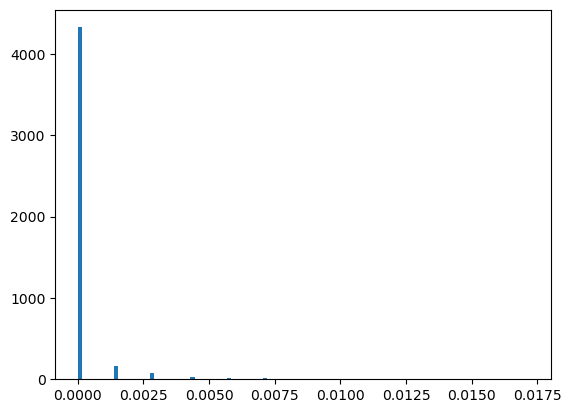

In [14]:
plt.hist(probability[:, 1000], bins=100)

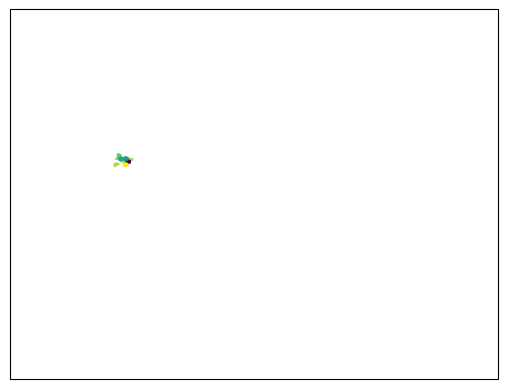

In [34]:
hexfunc.plot_hex_hist(probability[:, 10], hexbin_grid)

In [18]:
mask_file = '/storage/shared/oceanparcels/input_data/NEMO_Ensemble/GRID/NATL025-CJMenobs01_byte_mask.nc'
mask = xr.open_dataset(mask_file, decode_times=False)

/tmp/ipykernel_572169/1146159799.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.cm.get_cmap('viridis')


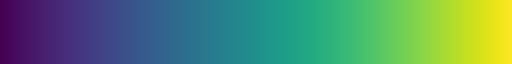

In [42]:
plt.cm.get_cmap('viridis')

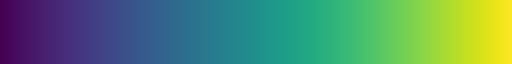

In [43]:
plt.cm.viridis

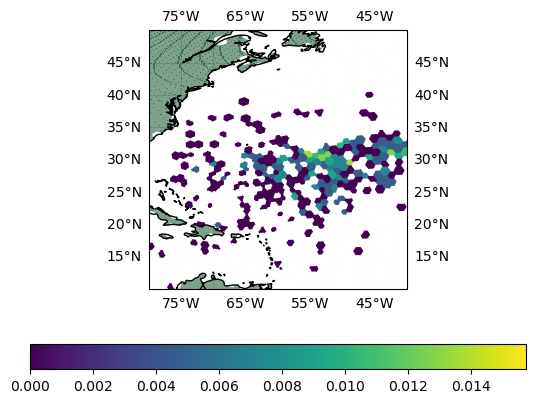

In [37]:
# Plot NA_domain on a map
depth = 0
fig = plt.figure()
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.set_extent([-80, -40, 10, 50], crs=cartopy.crs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, zorder=0, linestyle='--', linewidth=0.5)

ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0,depth,:,:], cmap='Greens_r', alpha=0.5)


im = hexfunc.plot_hex_hist(probability[:, 1300], hexbin_grid, ax=ax)
# add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='horizontal')

In [30]:
def entropy(Pdf):
    Pdf = Pdf / np.nansum(Pdf)  # Normalize Pdf to sum to 1, ignoring NaNs
    # Replace zeros with a very small number to avoid log(0)
    Pdf_safe = np.where(Pdf > 0, Pdf, np.finfo(float).eps)
    return -np.nansum(Pdf_safe * np.log(Pdf_safe))

def kullback_leibler(P, Q):
    P = P / np.nansum(P)  # Normalize P to sum to 1, ignoring NaNs
    Q = Q / np.nansum(Q)  # Normalize Q to sum to 1, ignoring NaNs
    # Replace zeros in P and Q with a very small number to avoid division by zero and log(0)
    P_safe = np.where(P > 0, P, np.finfo(float).eps)
    Q_safe = np.where(Q > 0, Q, np.finfo(float).eps)
    return np.nansum(P_safe * np.log(P_safe / Q_safe))

In [32]:
ent_pset_members = np.zeros((probability.shape[1]))

for i in range(0, probability.shape[1]):
    ent_pset_members[i] = entropy(probability[:, i])


/tmp/ipykernel_572169/2068694224.py:2: RuntimeWarning: invalid value encountered in divide
  Pdf = Pdf / np.nansum(Pdf)  # Normalize Pdf to sum to 1, ignoring NaNs


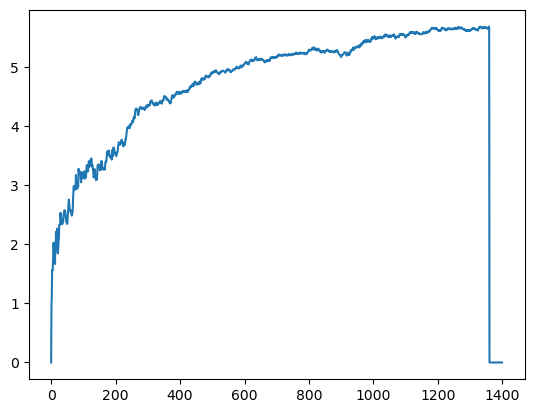

In [33]:
plt.plot(ent_pset_members)

# # Probability distributions in the Hexgrid

> Obs: We compared the trajectories of the from the moment of the release, despite the particles been released at different times. The analysis that we are performing is based in spacial variability of particle trajectories from the starting location. And we are measuring how we can increase the variability of the trajectories by doing a continous release, etc. If we compared the spacial location of the particles at the same time, despite been relaesed at different times, this will make unfair comparissons about instant position of particles in the space. This creates an unfair comparison between distributions with long release time periods over distributions with short time periods. 

In [ ]:
def plot_hex_hist(counts, grid, title=None, maxnorm=None, extent=(-85, -30, 20, 50), label='Particles per bin', ax=None, return_fig=False):
    """
    Plot a histogram of particle counts in a hexagonal grid

    Parameters
    ----------
    counts : array-like
        Array of particle counts. Should be the same length as the grid
    grid : tool.countGrid object
        Grid object containing the hexagonal grid
    title : str, optional
        Title of the plot, by default None
    maxnorm : int, optional
        Maximum value of the colorbar, by default None  
    label : str, optional
        Label of the colorbar, by default 'Particles per bin'
    extent : tuple, optional
        Extent of the map, by default (-85, -30, 20, 50)
    ax : matplotlib.axes.Axes, optional
        Axes to plot to, by default None
    return_fig : bool, optional
        Whether to return the figure, by default False
    """
    if not maxnorm:
        maxnorm = counts.max()

    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'projection': cart.crs.PlateCarree()})
    else:
        fig = ax.figure
        # ax.set_projection(cart.crs.PlateCarree())

    # Creating the histogram
    pcolorhex(ax, grid.hexagons, get_colors(counts, plt.cm.viridis, 0,
                                            maxnorm), draw_edges=False, alpha=1., label=' concentration')

    # Cartopy stuff
    ax.coastlines()
    ax.gridlines(draw_labels=["left", "bottom"])
    ax.set_extent(extent, crs=cart.crs.PlateCarree())

    # Colorbar
    divider = make_axes_locatable(ax)
    ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)
    cmap = plt.cm.viridis
    cmap.set_bad('w')
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=maxnorm))
    cbar = plt.colorbar(sm, cax=ax_cb, label=label)
    fig.add_axes(ax_cb)

    # Title
    if title:
        ax.set_title(title)

    plt.tight_layout()

    if return_fig:
        return fig